In [68]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings


# Set figure size to (12, 6)
plt.rcParams['figure.figsize'] = (12,6)
warnings.simplefilter('ignore')

#### Load data from .txt file

In [69]:
df = pd.read_csv('/Users/julia/Documents/SPICED/_data/ECA_Tempelhof/TG_STAID002759.txt', header=14)
df

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0
...,...,...,...,...
52711,111448,20200426,124,0
52712,111448,20200427,151,0
52713,111448,20200428,170,0
52714,111448,20200429,120,0


In [70]:
#get rid of whitespace in column names
df.columns = [x.strip() for x in df.columns]

In [71]:
df['datetime'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df['temp'] = df['TG']/10
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

In [72]:
df.head()

,SOUID,DATE,TG,Q_TG,datetime,temp,year,month,day
0,127488,18760101,22,0,1876-01-01,2.2,1876,1,1
1,127488,18760102,25,0,1876-01-02,2.5,1876,1,2
2,127488,18760103,3,0,1876-01-03,0.3,1876,1,3
3,127488,18760104,-58,0,1876-01-04,-5.8,1876,1,4
4,127488,18760105,-98,0,1876-01-05,-9.8,1876,1,5


In [73]:
df2 = df[(df['datetime'].dt.year >= 1950) & (df['datetime'].dt.year < 2020)]

(728294.0, 731947.0)

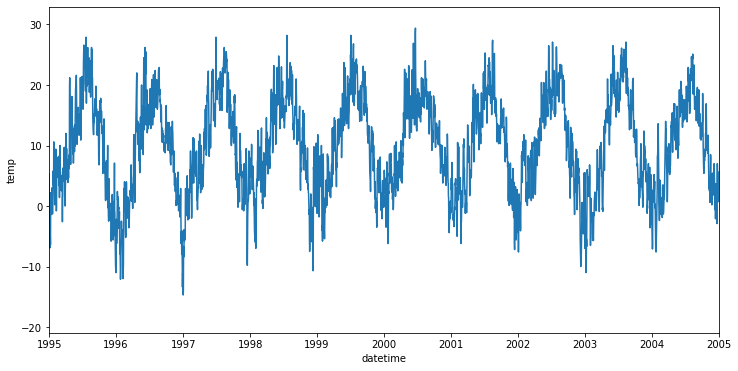

In [80]:
ax = sns.lineplot(x='datetime', y='temp', data=df2)
ax.set_xlim(pd.to_datetime('1995'), pd.to_datetime('2005'))

<Figure size 432x1296 with 0 Axes>

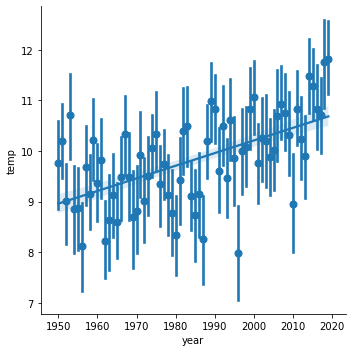

In [75]:
plt.figure(figsize=(6,18))
ax = sns.lmplot(x="year", y="temp", data=df2, x_estimator=np.mean)

### Remove the trend - differencing

In [81]:
df2['diff'] = df2['temp'].diff().fillna(0)
df2.head()

,SOUID,DATE,TG,Q_TG,datetime,temp,year,month,day,difference,diff
27028,111448,19500101,-35,0,1950-01-01,-3.5,1950,1,1,0.0,0.0
27029,111448,19500102,10,0,1950-01-02,1.0,1950,1,2,4.5,4.5
27030,111448,19500103,29,0,1950-01-03,2.9,1950,1,3,1.9,1.9
27031,111448,19500104,-1,0,1950-01-04,-0.1,1950,1,4,-3.0,-3.0
27032,111448,19500105,-30,0,1950-01-05,-3.0,1950,1,5,-2.9,-2.9


In [82]:
df2['diff'].mean(), df2['diff'].std()

(0.00037157273047287297, 2.381606404909236)

(728294.0, 731947.0)

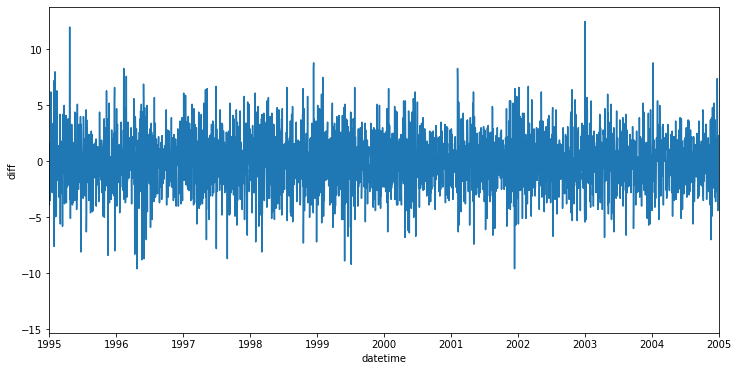

In [83]:
ax = sns.lineplot(x='datetime', y='diff', data=df2)
ax.set_xlim(pd.to_datetime('1995'), pd.to_datetime('2005'))

### Remove seasonality

In [85]:
df2['daily_mean'] = df2.groupby(['month', 'day'])['diff'].transform('mean')
df2['deseason'] = df2['diff'] - df2['daily_mean']

(728294.0, 731947.0)

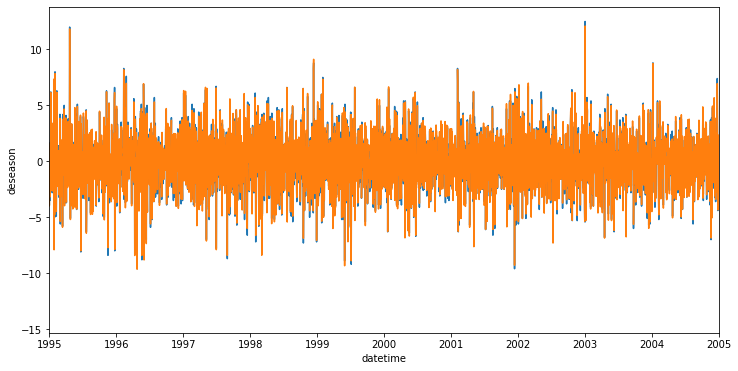

In [89]:
ax = sns.lineplot(x="datetime", y="diff", data=df2)
sns.lineplot(x="datetime", y="deseason", data=df2)
ax.set_xlim(pd.to_datetime('1995'), pd.to_datetime('2005'))


In [88]:
df2['deseason'].mean(), df2['deseason'].std()

(4.186079695461536e-18, 2.362586605582337)

In [56]:
df2['daily_mean_temp'] = df2.groupby(['month','day'])['temp'].transform('mean')

/Users/julia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


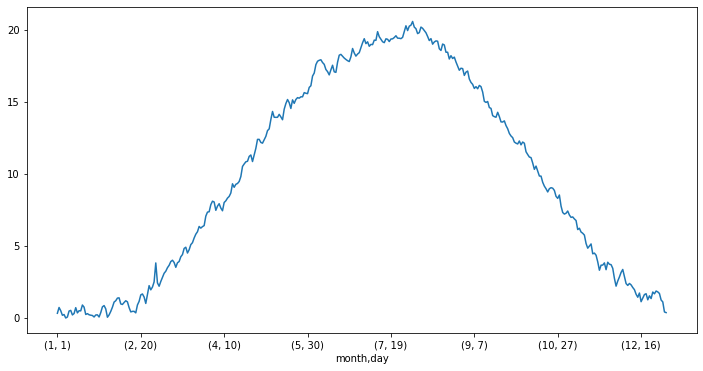

In [65]:
# mean temperatures of each day in the year
df2.groupby(['month','day'])['temp'].mean().plot()

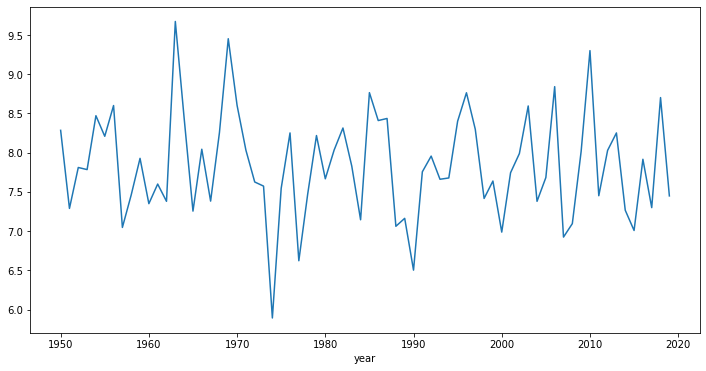

In [90]:
# check if volatility changes over time
df2.groupby(['year'])['temp'].std().plot()